# Network Analysis
## Find the Potential Influencers

## Preprocessing - PCA - Logistic Regression - Data Mining - Predict

# Part 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.stats import norm

## Read Data

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874855,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [ ]:
cols = ['D_follower_count', 'D_following_count','D_listed_count', 'D_mentions_received', 
 'D_retweets_received','D_mentions_sent', 'D_retweets_sent', 'D_posts',
 'D_network_feature_1', 'D_network_feature_2','D_network_feature_3']

## Make an matrix taking diffence

In [ ]:
for i in range(len(cols)):
    df[cols[i]] = ""
for i in range(11):
    df[cols[i]] = df.iloc[:,i+1] - df.iloc[:,i+1+11]

In [ ]:
df_diff = pd.concat([pd.DataFrame(df['Choice']), df.iloc[:,23:]], axis=1)    
df_diff.head()

,Choice,D_follower_count,D_following_count,D_listed_count,D_mentions_received,D_retweets_received,D_mentions_sent,D_retweets_sent,D_posts,D_network_feature_1,D_network_feature_2,D_network_feature_3
0,0,-34235,-29506,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061
1,0,-17671,331,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149289
2,0,3688,733,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574
3,0,-19542,-17630,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967
4,1,38035,-849,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036


## PCA

In [ ]:
X = df_diff.loc[:,cols].values
X = StandardScaler().fit_transform(X)
y = df_diff['Choice']

In [ ]:
pca = PCA(n_components=6)
pcs = pca.fit_transform(X)

### Variance Explained by the Principal Components

In [ ]:
sum(pca.explained_variance_ratio_)

0.9041007229048631

In [ ]:
# New feature dimension using PC rotation
PC_df = pd.DataFrame(data=pcs, columns = ["PC1", "PC2", "PC3", "PC4", "PC5","PC6"])
PC_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.208155,-0.582200,-1.118718,-0.500763,-0.341205,-0.317906
1,-0.069094,0.324012,0.667526,0.098116,0.075358,-0.017488
2,0.010312,0.386770,-0.779805,-0.147744,-0.079119,-0.073695
3,0.426485,-3.205047,0.225168,0.492532,0.291974,-0.940444
4,-0.225916,1.814500,-0.485291,-0.296283,0.001572,0.118273


### EigenVector / EigenValue

In [ ]:
eivec = pca.components_
print(f"Shape of the eigenvector is {pca.components_.shape}")
print(f"The explaned variance of each principal components is {pca.explained_variance_}")

Shape of the eigenvector is (6, 11)
The explaned variance of each principal components is [3.89588327 2.02284415 1.56039773 1.08690023 0.8460901  0.534801  ]


### Scree Plot

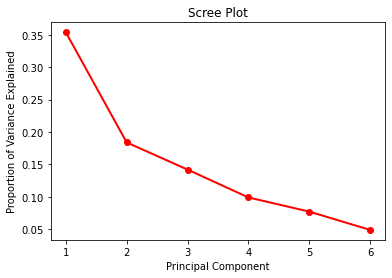

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

## For our project fine the standardized new data and Multiply it using Eigenvectors. With that value, conduct logistic regression and see the result

## Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(PC_df,y, test_size=0.3, random_state=0)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

### Accuracy

In [ ]:
score = LR.score(X_train, y_train)
print("Training Accuracy is",score)

Training Accuracy is 0.7085714285714285


In [ ]:
score_t = LR.score(X_test, y_test)
print("Test Accuracy is",score_t)

Test Accuracy is 0.7218181818181818


### Confusion Matrix

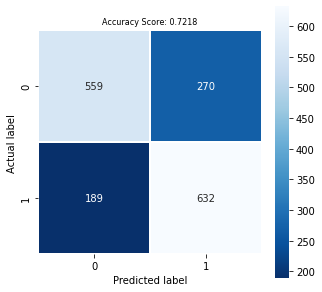

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.7, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(score_t,4))
plt.title(all_sample_title, size = 8);

### Importance of P

In [ ]:
# https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance

def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

In [ ]:
P_value = pd.DataFrame(logit_pvalue(LR, X_train).round(5)
            ).rename({0:'Intercept', 1:'PC1', 2:'PC2', 3:'PC3', 
                      4:'PC4', 5:'PC5', 6:'PC6'}, axis=0).rename({0:'P-value'}, axis=1)
P_value

,P-value
Intercept,0.05853
PC1,0.00000
PC2,0.00000
PC3,0.00000
PC4,0.00000
PC5,0.00000
PC6,0.21413


### Business Model

One of the business utilizations based on the probability from logistic regression is lift analysis, which is a kind of targetting method. In general, the response rate of the customer is very low. A business is usually charged by the amount of cusotmer list from intermediary companies, which accounts for notable amount of customer aquisition cost. Thus, securing concise and representative list is important. With the probability resulting from the aformentioned logit model and the cost for securing each potentiontial customer, we can conduct lift analysis, finding the optimal point to stop promoting.

## 2) Financial Value

In [ ]:
# Setting up a mask to pull out the dataframe data so it is only the test data

mask = []
for i in list(df.index):
  if i in list(y_test.index):
    mask.append(True)
  else:
    mask.append(False)

In [ ]:
#Extract the follower count on A and B on the newly filtered dataframe

A_followers = df[mask]['A_follower_count']
B_followers = df[mask]['B_follower_count']

In [ ]:
#Sort the test sets because when we gathered the follower counts it was filtered by index, but the test set was randomly assigned so there was a random sort

y_test.sort_index(inplace = True)
X_test.sort_index(inplace = True)

In [ ]:
#Gather the predictions on each of the x test

predictions = list(LR.predict(X_test))

In [ ]:
#Starts by initiallizing the profit at 0. Then checks if the prediction matches the true y value.
#If there is a match then it determines the influencer and then multiplies purchase probability times followers
# and then times 10 which is the profit per an item sold. Then subtracts 10 for the price of the tweets
# Lastly if there is not a match it just subtracts the 10 dollars for the price of the tweets

Analytical_Profit = 0
for i in range(len(predictions)):
  if predictions[i] == list(y_test)[i]:
    if predictions[i] == 1:
      Analytical_Profit = Analytical_Profit + list(A_followers)[i]*.00015*10 - 10
    else:
      Analytical_Proft = Analytical_Profit + list(B_followers)[i]*.00015*10 - 10
  else:
    Analytical_Profit = Analytical_Profit - 10

In [ ]:
Analytical_Profit

1089436.9524999994

In [ ]:
# For nonanalytical the profit was again initialized at 0, but then the code finds the influencer and then runs the necessary calculations
#to provide the profit from using the influencer

Non_Analytical_Profit = 0
for i in range(len(predictions)):
  if predictions[i] == 1:
    Non_Analytical_Profit = Non_Analytical_Profit + list(A_followers)[i]*.0001*10 - 10
  else:
    Non_Analytical_Proft = Non_Analytical_Profit + list(B_followers)[i]*.0001*10 - 10

In [ ]:
Non_Analytical_Profit

941057.6049999981

In [ ]:
#This finds the influencer for each line and runs the necessary calculations given that it is right everytime.

Perfect_Profit = 0
for i in range(len(predictions)):
  if predictions[i] == 1:
    Perfect_Profit = Perfect_Profit + list(A_followers)[i]*.00015*10 - 10
  else:
    Perfect_Profit = Perfect_Profit + list(B_followers)[i]*.00015*10 - 10

In [ ]:
Perfect_Profit

2728031.5919999923

In [ ]:
print(f"""Analytical:Nonanalytical Profit:{Analytical_Profit/Non_Analytical_Profit}""")

Analytical:Nonanalytical Profit:1.1576729699772221


In [ ]:
print(f"""Perfect:Analytical Profit:{Perfect_Profit/Analytical_Profit}""")

Perfect:Analytical Profit:2.5040747752679096


In [ ]:
print(f"""Perfect:Non_Analytical Profit:{Perfect_Profit/Non_Analytical_Profit}""")

Perfect:Non_Analytical Profit:2.898899682129446


# Part 2. Finding Influencers from Tweeter

In [ ]:
import tweepy
import pandas as pd
import time
import re

In [ ]:
CONSUMER_KEY = 'XN4UTQPjpxxtWc4WlT5uiWMCk'
CONSUMER_SECRET = 'r3FnIoXcR2oM2w44eWfwOXWZ1LSzFkAbKGVmuD55nXYSr1tnvk'
ACCESS_TOKEN = '970761218821632001-0j98sHzA3tJJTq1ki1keZq4RZwxfAMF'
ACCESS_TOKEN_SECRET = 'icsSPU4VsuDfCuYXDuDVNaTvbsmYROg2bL28gooQUkfdv'


In [ ]:
def auth():
    try:
        auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
        api = tweepy.API(auth,wait_on_rate_limit = True)
    except:
        print("An error occurred during the authentication")
    
    return api

In [ ]:

def search_by_hashtag(api, query):
    df = pd.DataFrame(columns=['id', 'created_at', 'username', 'location', 'following', 
                               'followers', 'retweetcount','favorite', 'text']) 
    tweets = tweepy.Cursor(api.search, q="#" + query, rpp = 100).items(5000) 
    count = 0
    for tweet in tweets: 
        #print(tweet)
        id = tweet.id_str
        created_at = tweet.created_at
        username = tweet.user.screen_name 
        #location = tweet.user.location 
        following = tweet.user.friends_count 
        followers = tweet.user.followers_count 
        favorite = tweet.favorite_count
        retweetcount = tweet.retweet_count 
        text = tweet.text 
        
        tweets_formatted = [id, created_at, username, location, following, 
                     followers, retweetcount, favorite, text] 
        #print(tweets_formatted)
        df.append(tweets_formatted)
        time.sleep(.01)
        if count % 1000 = 0:
            print(count)
        count+=1
    filename = 'tweets.csv'
    df.to_csv(filename)
    return df 



SyntaxError: invalid syntax (<ipython-input-64-6bc67f3f2c64>, line 23)

In [ ]:
api = auth()
search_by_hashtag(api,"wordle")

['1491928166700662811', datetime.datetime(2022, 2, 11, 0, 12, 48), 'YogaBunnyRunner', 'No Name City', 1755, 1803, 0, 0, 'Wordle 237 6/6 #Wordle \n\nThat was hard!\n\n⬜🟨🟨⬜⬜\n🟨🟨⬜🟨⬜\n🟨⬜🟨⬜🟨\n⬜⬜🟨🟩🟩\n🟨⬜⬜🟩🟩\n🟩🟩🟩🟩🟩']
['1491928159968804874', datetime.datetime(2022, 2, 11, 0, 12, 46), 'eybyon', 'Houston, TX', 3629, 3574, 0, 0, 'Um, we may have a new contender for the toughest #Wordle.\n\nWordle 126 6/6\n\n⬛⬛⬛⬛🟩\n⬛🟨⬛⬛🟩\n⬛🟨⬛⬛🟩\n🟩⬛⬛⬛🟩\n🟩⬛⬛🟩🟩\n🟩🟩🟩🟩🟩']
['1491928150288510980', datetime.datetime(2022, 2, 11, 0, 12, 44), 'Oksigeno_', '프사는 @very_t1red', 827, 422, 0, 0, '#한글 #워들 #Korean #Wordle https://t.co/ncprBrBD1h 32 6/6\n\n⬜⬜⬜🟩⬜\n⬜⬜⬜🟩🟨\n🟩🟨⬜🟩⬜\n🟩⬜🟩🟩🟨\n🟩🟩🟩🟩⬜\n🟩🟩🟩🟩🟩']
['1491928103186472961', datetime.datetime(2022, 2, 11, 0, 12, 33), 'shoya0', 'Seoul, Korea', 264, 146, 0, 0, '#한글 #워들 #Korean #Wordle https://t.co/NR1YFF7IRm 32 5/6\n\n⬜⬜⬜⬜⬜\n⬜⬜🟨⬜🟨\n🟩⬜🟨🟨⬜\n🟩⬜🟩🟩⬜\n🟩🟩🟩🟩🟩']
['1491928082466455572', datetime.datetime(2022, 2, 11, 0, 12, 28), 'myClevertouch', 'London', 4977, 4152, 0, 0, 'Who doesn’t love a game 

,id,created_at,username,location,following,followers,retweetcount,favorite,text
0,1491928166700662811,2022-02-11 00:12:48,YogaBunnyRunner,No Name City,1755,1803,0,0,Wordle 237 6/6 #Wordle \n\nThat was hard!\n\n⬜...
1,1491928159968804874,2022-02-11 00:12:46,eybyon,"Houston, TX",3629,3574,0,0,"Um, we may have a new contender for the toughe..."
2,1491928150288510980,2022-02-11 00:12:44,Oksigeno_,프사는 @very_t1red,827,422,0,0,#한글 #워들 #Korean #Wordle https://t.co/ncprBrBD1...
3,1491928103186472961,2022-02-11 00:12:33,shoya0,"Seoul, Korea",264,146,0,0,#한글 #워들 #Korean #Wordle https://t.co/NR1YFF7IR...
4,1491928082466455572,2022-02-11 00:12:28,myClevertouch,London,4977,4152,0,0,Who doesn’t love a game of #Wordle?! Here’s Co...
...,...,...,...,...,...,...,...,...,...
4995,1491790855757496325,2022-02-10 15:07:10,evaheaven,,461,79,0,0,#한글 #워들 #Korean #Wordle https://t.co/BKeBsfSC9...
4996,1491790832722415621,2022-02-10 15:07:05,TAKI_Biwakoking,琵琶湖の近く,1865,787,0,0,Wordle 237 3/6\n\n🟨🟨⬛⬛⬛\n⬛🟨⬛🟨🟨\n🟩🟩🟩🟩🟩\n\n⬇️ ⬇️...
4997,1491790799968735248,2022-02-10 15:06:57,whatinmysoft,,106,9,0,0,#한글 #워들 #Korean #Wordle https://t.co/hAQnT6MGz...
4998,1491790753441349634,2022-02-10 15:06:46,NanaActs,Rhode Island,213,169,0,0,@FilmmakerJulie Playing #Wordle after midnight...


In [ ]:
df = pd.read_csv('tweets.csv')
df = df.drop(columns = 'Unnamed: 0')

In [ ]:
mask = df['text'].str.startswith("RT")
df['isRetweet'] = 0
df.loc[mask,['isRetweet']] = 1


In [ ]:
df['Retweet Author'] = df['text'].map(lambda x: re.match(r'(?<=RT ).{3,15}\s',x))


In [ ]:
def getOriginal(s):
    search = re.search(r'(?<=RT ).{3,15}\:',s)
    if search != None: 
        return search[0][:-1]
    else:
         return None

In [ ]:
df["RetweetAuthor"] = df['text'].map(getOriginal)

In [ ]:
network_df = df[["username",'RetweetAuthor']]

In [ ]:
network_df["Type"] = network_df["RetweetAuthor"].map(lambda x: "Tweet" if x == None else "RT")

<ipython-input-104-da496eb91049>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_df["Type"] = network_df["RetweetAuthor"].map(lambda x: "Tweet" if x == None else "RT")


In [ ]:
isTweetMask = network_df["Type"] == 'Tweet'
network_df.loc[isTweetMask,["RetweetAuthor"]] = network_df['username']

/Users/narain/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-107-fadc618a033b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_df.loc[isTweetMask,["RetweetAuthor"]] = network_df['username']


In [ ]:
network_df

,username,RetweetAuthor,Type
0,YogaBunnyRunner,YogaBunnyRunner,Tweet
1,eybyon,eybyon,Tweet
2,Oksigeno_,Oksigeno_,Tweet
3,shoya0,shoya0,Tweet
4,myClevertouch,myClevertouch,Tweet
...,...,...,...
4995,evaheaven,evaheaven,Tweet
4996,TAKI_Biwakoking,TAKI_Biwakoking,Tweet
4997,whatinmysoft,whatinmysoft,Tweet
4998,NanaActs,NanaActs,Tweet


In [ ]:
import networkx as nx
network = network_df[["username","RetweetAuthor"]].apply(tuple,axis = 1)

network_graph= nx.DiGraph()
network_graph.add_edges_from(network)

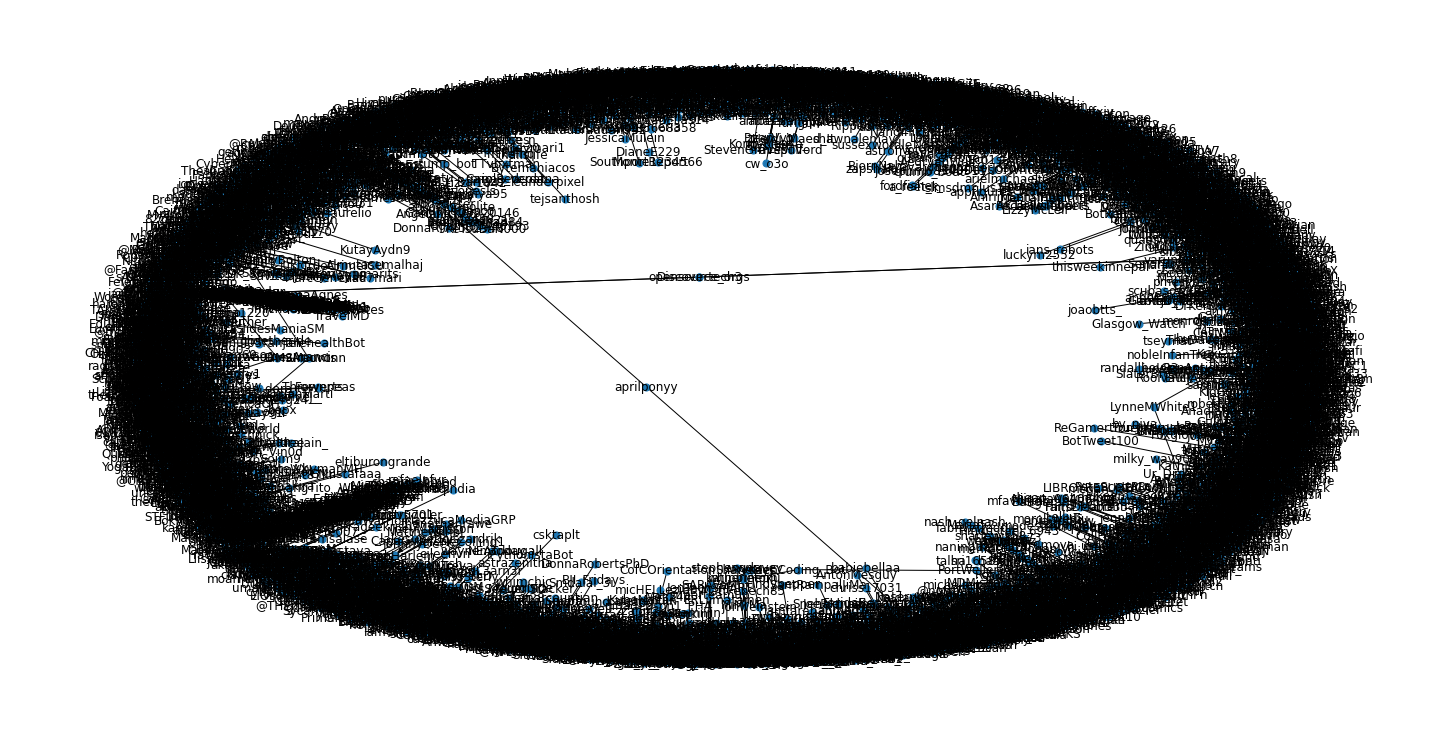

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))

nx.draw(network_graph, with_labels = True, node_size = 50, font_size = 12)  
plt.show()  

In [ ]:
degree = nx.degree_centrality(network_graph)
betweenness = nx.betweenness_centrality(network_graph)
closeness = nx.closeness_centrality(network_graph)

In [ ]:
metrics = pd.DataFrame([degree,closeness,betweenness]).T

metrics.reset_index(inplace=True)
metrics.columns = ["username","degree","closeness","betweenness"]
# merge with original data

final_df = df.merge(metrics,left_on = "username",right_on = "username")
final_df = final_df[["username","followers","following",'retweetcount','favorite','degree','closeness','betweenness','text']]
final_df['closeness'].value_counts()


0.0    5000
Name: closeness, dtype: int64

In [ ]:
def standardize(row): 
    row -= row.mean()
    row /= row.std()
    return row
final_df.set_index('username')[['followers','following','retweetcount','favorite']].apply(standardize)

,followers,following,retweetcount,favorite
username,,,,
YogaBunnyRunner,-0.038145,0.223004,-0.190755,-0.048708
eybyon,-0.020434,0.722956,-0.190755,-0.048708
eybyon,-0.020434,0.722956,-0.190755,-0.048708
eybyon,-0.020434,0.722956,-0.190755,-0.048708
eybyon,-0.020434,0.722956,-0.190755,-0.048708
...,...,...,...,...
Jax_Schoeman,-0.055285,-0.113144,-0.190755,-0.048708
evaheaven,-0.055385,-0.122214,-0.190755,-0.048708
whatinmysoft,-0.056085,-0.216923,-0.190755,-0.048708


## Using the model we find the Part 1, find the top influencers

## For our project fine the standardized new data and Multiply it using Eigenvectors. With that value, conduct logistic regression and see the result

In [ ]:
tw = pd.read_csv('tweets.csv')

## Follwing, Followers, Retweetcount, Favorite in Tweet data are considered as a proxy for Follwing, Follwers, Retweetcount, and Mentions received in the given data

In [ ]:
tw_cleaned = tw.iloc[:,5:9].diff()[1:]
X_t = tw_cleaned.values
X_t = StandardScaler().fit_transform(X_t)
tw_pca = X_t @ pca.components_[:,[1,0,4,5]].T
LR.predict_proba(tw_pca)[:,1]

/Users/junsu/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.52750965, 0.49983697, 0.51385519, ..., 0.50787945, 0.51742709,
       0.51994527])

In [ ]:
tw_cleaned['Prob'] = LR.predict_proba(tw_pca)[:,1]

/Users/junsu/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
tw_cleaned.nlargest(10, 'Prob').index

Int64Index([3608, 1882, 281, 3628, 1966, 1616, 1785, 543, 540, 1267], dtype='int64')

In [ ]:
tw_cleaned.nlargest(10, 'Prob')

,following,followers,retweetcount,favorite,Prob
3608,99.0,5283443.0,132.0,0.0,1.000000
1882,1302.0,3787610.0,101.0,0.0,1.000000
281,163.0,1631624.0,3.0,46.0,0.999944
3628,-1102.0,69506.0,132.0,1702.0,0.999149
1966,208994.0,506674.0,1.0,7.0,0.998797
1616,-730.0,376156.0,65.0,910.0,0.996964
1785,440.0,878570.0,0.0,12.0,0.994818
543,-455.0,874345.0,2.0,-1.0,0.994313
540,4296.0,582807.0,0.0,0.0,0.972045
1267,2210.0,583639.0,2.0,7.0,0.971887


## Potential Top 10 Influencers!

In [ ]:
top10 = tw.iloc[tw_cleaned.nlargest(10, 'Prob').index,:]

In [ ]:
np.sort(LR.predict_proba(tw_pca)[:,1])[-10:][::-1]

/Users/junsu/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.        , 1.        , 0.99994377, 0.99914931, 0.99879665,
       0.99696448, 0.99481794, 0.99431258, 0.97204494, 0.97188678])

In [ ]:
top10['Prob'] = np.sort(LR.predict_proba(tw_pca)[:,1])[-10:][::-1]

/Users/junsu/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/var/folders/gp/5lrc5h3s21d02v2rsj713dxw0000gn/T/ipykernel_17103/2854485837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10['Prob'] = np.sort(LR.predict_proba(tw_pca)[:,1])[-10:][::-1]


In [ ]:
top10.iloc[:,1:]

,id,created_at,username,location,following,followers,retweetcount,favorite,text,Prob
3608,1491819485405265924,2022-02-10 17:00:56,MKBHD,NYC,421,5283489,132,0,RT @WVFRM: Coming soon: Everything you ever wa...,1.000000
1882,1491864028624338950,2022-02-10 19:57:56,afpfr,Paris,1352,3787645,101,0,RT @robin__legrand: Une octogénaire américaine...,1.000000
281,1491919546001035265,2022-02-10 23:38:32,VigneshShivN,"Chennai, India",231,1631629,3,46,Wordle 237 3/6\n\n⬛🟨⬛🟨🟨\n⬛🟨⬛🟩🟩\n🟩🟩🟩🟩🟩\n\nWoah!...,0.999944
3628,1491818947603222529,2022-02-10 16:58:48,WVFRM,NaN,10,69990,132,1703,Coming soon: Everything you ever wanted to kno...,0.999149
1966,1491861049032724483,2022-02-10 19:46:06,raehanbobby,"Toronto, Canada, US",209017,506692,1,7,Wordle 236 4/6\n\n🟨⬜🟨⬜🟩\n🟨🟨⬜⬜🟩\n⬜🟩⬜🟩🟩\n🟩🟩🟩🟩🟩\n...,0.998797
1616,1491871855292076044,2022-02-10 20:29:02,CerfiaFR,France,3,376870,65,911,🇺🇸 FLASH | Une #américaine a été sauvée d'une ...,0.996964
1785,1491866617772396545,2022-02-10 20:08:13,rahsangulsan,İstanbul Turkey,994,878701,0,13,New York Times’a geçmiş güzelimiz. İnşallah bi...,0.994818
543,1491910485343707136,2022-02-10 23:02:32,tsnjamesduthie,your tv,1525,874950,2,0,RT @RubberBootsPod: 📢 Rubber Boots Super Bowl ...,0.994313
540,1491910633696157697,2022-02-10 23:03:08,abusulayman,Saudi Arabia,4406,584680,2,0,RT @abusulayman: I think @nyt should add a tim...,0.972045
1267,1491882701061820417,2022-02-10 21:12:08,abusulayman,Saudi Arabia,4406,584680,2,7,I think @nyt should add a time score to the #W...,0.971887


### Business Model

One of the business utilizations based on the probability from logistic regression is lift analysis, which is a kind of targetting method. In general, the response rate of the customer is very low. A business is usually charged by the amount of cusotmer list from intermediary companies, which accounts for notable amount of customer aquisition cost. Thus, securing concise and representative list is important. With the probability resulting from the aformentioned logit model and the cost for securing each potentiontial customer, we can conduct lift analysis, finding the optimal point to stop promoting.